In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("~/data/diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
target = "price"

In [6]:
y = df[target]
X = df.drop(columns = target)

In [7]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [9]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [14]:
X_dummy = pd.get_dummies(X, drop_first = True)
X_dummy

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [12]:
X_dummy.shape

(53940, 26)

In [13]:
X.shape

(53940, 9)

In [15]:
from sklearn import model_selection

In [75]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                                , test_size = 0.3, random_state = 123)

# random_state will control (it will reproduce the same combinations) the randomness of the records when the full 
# set is split between training and test sets

In [64]:
X_test.shape

(16182, 23)

In [65]:
16182/ len(X_dummy)

0.3

In [66]:
X_train.shape

(37758, 23)

In [67]:
37758 / len(X_dummy)

0.7

In [68]:
from sklearn import linear_model
from sklearn import preprocessing

In [69]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_test)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


In [70]:
lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

In [72]:
mse_train = ((y_train_pred - y_train) **2).mean()
mse_test = ((y_test_pred - y_test) **2).mean()

mse_train, mse_test

(1270791.8536412276, 1291193.8989862807)

In [73]:
rmse_train = ((y_train_pred - y_train) **2).mean() ** 0.5
rmse_test = ((y_test_pred - y_test) **2).mean() ** 0.5

rmse_train, rmse_test

(1127.2940404531676, 1136.3071323309912)

In [74]:
1121, 1119

(1121, 1119)

In [77]:
import numpy as np

In [78]:
baseline_prediction = np.mean(y_train)

In [80]:
mse_test / ((baseline_prediction - y_test) ** 2).mean()

0.08081990379757471

In [81]:
r2 = 1 - mse_test / ((baseline_prediction - y_test) ** 2).mean()
r2

0.9191800962024252

In [82]:
from sklearn import metrics

In [83]:
metrics.r2_score(y_test, y_test_pred)

0.9191767921578132

In [84]:
r2 = 1 - mse_test / ((y_test.mean() - y_test) ** 2).mean()
r2

0.9191767921578138

In [85]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lr.coef_

array([ 5.33403267e+03, -9.26599883e+01, -6.30648066e+01, -1.09145042e+03,
        3.34987089e-01, -3.93679219e+01,  1.78566692e+02,  4.20275528e+02,
        3.42560017e+02,  3.14744905e+02, -8.69731786e+01, -1.07496790e+02,
       -2.05656449e+02, -3.51321939e+02, -4.44612840e+02, -5.33179255e+02,
        9.67850802e+02,  1.59262395e+03,  1.03251455e+03,  1.66519931e+03,
        1.80290187e+03,  1.28212996e+03,  1.48387657e+03])

In [87]:
lr.intercept_

3913.4619594299647

In [88]:
X_dummy.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [90]:
pd.DataFrame({"coeff":lr.coef_, "feature": X_dummy.columns})

,coeff,feature
0,5334.032665,carat
1,-92.659988,depth
2,-63.064807,table
3,-1091.450423,x
4,0.334987,y
5,-39.367922,z
6,178.566692,cut_Good
7,420.275528,cut_Ideal
8,342.560017,cut_Premium
9,314.744905,cut_Very Good


In [91]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [92]:
poly = preprocessing.PolynomialFeatures(degree = 2)

In [96]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_std = scaler.fit_transform(X_train_poly)
X_test_std = scaler.transform(X_test_poly)


lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print("Train r2:", metrics.r2_score(y_train, y_train_pred))
print("Test r2:", metrics.r2_score(y_test, y_test_pred))

Train r2: 0.9717305364365785
Test r2: 0.9698115833527625


In [97]:
len(lr.coef_)

300

<AxesSubplot:>

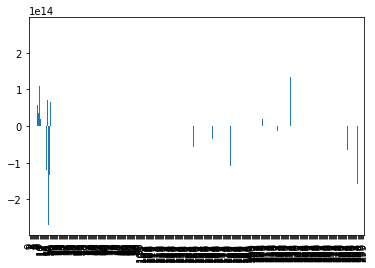

In [99]:
pd.Series(lr.coef_).plot.bar()

In [100]:
poly = preprocessing.PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_std = scaler.fit_transform(X_train_poly)
X_test_std = scaler.transform(X_test_poly)


lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print("Train r2:", metrics.r2_score(y_train, y_train_pred))
print("Test r2:", metrics.r2_score(y_test, y_test_pred))

Train r2: 0.9820433775133419
Test r2: -1.3344099390672488e+19


In [102]:
print("Test  baseline r2:", metrics.r2_score(y_test, [np.mean(y_test)] * len(y_test)))

Test  baseline r2: 0.0


In [105]:
print(list(lr.coef_))

[10072793609.754692, -438948.2795895911, -206803.0354363213, -98715.52748131745, -1417636.3698054156, -836115.3716971038, 1546303.169633454, -48056809480967.58, 37170692162960.836, -13846663309459.967, 26452849429889.582, 28775770851477.117, 4622550851717.675, -35818339332247.805, 7388361698406.307, 7063136466505.694, 5396416389345.117, 52688425086761.31, 3008675348243.4272, 21025488145082.883, -10555800556449.85, 9151615594220.08, -5185710875548.088, -3495331366368.98, -10195.016357421875, 849688.8454589844, 231574.99438476562, -1019784.4396972656, -107554.6396484375, 652397.1953125, -2772610945432.312, -3773665857168.588, 2080055885574.3083, 14227491877446.365, 5066279661372.02, 8107024805606.125, -12728546767231.465, 8019349248972.291, 10939552343464.201, -8047699714369.623, -12711668431665.137, -9136720542760.637, 9644941088777.86, -2423607719070.1436, 3228561862722.8237, -5481723861389.898, -786161883939.5431, 227636.7887878418, 119969.7033996582, -98663.18603515625, 1914805.16113

In [113]:
poly = preprocessing.PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_std = scaler.fit_transform(X_train_poly)
X_test_std = scaler.transform(X_test_poly)


lr = linear_model.Lasso(alpha = 10.0, max_iter = 5000)
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print("Train r2:", metrics.r2_score(y_train, y_train_pred))
print("Test r2:", metrics.r2_score(y_test, y_test_pred))

print(lr.coef_)

Train r2: 0.960726835073682
Test r2: 0.9588452744418552
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.94345723e+02 -1.05286996e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -5.19844269e+01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.16307226e+02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.67439524e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.13414631e+03
  1.53715052e+02  0.00000000e+00  3.70736066e+01  2.86842988e+02
  1.16764989e+02  1.84853808e+02  1.46525513e+01  1.79679436e+01
 -1.36731074e+02 -5.58719948e+02 -7.54294122e+02 -9.26275036e+02
  6.66832447e+02  1.13967149e+03  6.28396587e+02  1.27543545e+03
  1.43160028e+03  8.45405547e+02  1.06961659e+03  0.00000000e+00
  0.00000000e+00 -3.94901793e+02 -0.00000000e+00 -0.00000000e+00
  1.92853474e+01 -0.00000000e+00  7.26936091e+01 -0.00000000e+00
 -1.36938568e-02 -9.89470333e+01 -